In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
image_dir = 'ExampleImages'
images = []
for filename in os.listdir(image_dir):
    print(filename)
    image = cv2.imread(f'{image_dir}/{filename}')



bottas_2.jpg
bottas_3.jpg
bottas_1.jpg
hamilton_1.jpg
hamilton_2.jpg
russell_1.jpg


bottas_2.jpg
(1080, 1920, 3) <class 'numpy.ndarray'>
(256, 256) <class 'numpy.ndarray'>
bottas_3.jpg
(2160, 3840, 3) <class 'numpy.ndarray'>
(256, 256) <class 'numpy.ndarray'>
bottas_1.jpg
(1080, 1920, 3) <class 'numpy.ndarray'>
(256, 256) <class 'numpy.ndarray'>
hamilton_1.jpg
(1080, 1920, 3) <class 'numpy.ndarray'>
(256, 256) <class 'numpy.ndarray'>
hamilton_2.jpg
(1080, 1920, 3) <class 'numpy.ndarray'>
(256, 256) <class 'numpy.ndarray'>
russell_1.jpg
(432, 768, 3) <class 'numpy.ndarray'>
(256, 256) <class 'numpy.ndarray'>


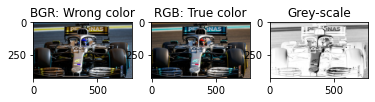

(6, 256, 256)
(6, 65536)

label_strs: ['bottas', 'bottas', 'bottas', 'hamilton', 'hamilton', 'russell']
label_ints: [0 0 0 1 1 2]
labels_arr: [0 0 0 1 1 2], (6,), <class 'numpy.ndarray'>

features: (6, 65536)
labels: (6, 1)
   pixels_1  pixels_2  pixels_3  pixels_4  pixels_5  pixels_6  pixels_7  \
0        76        77        79        70        72        73        78   
1        18        18        18        18        18        18        18   
2        81        81        81        82        82        82        83   
3        58        56        55        59        55        54        54   
4       124       120       120       123       120       110       110   
5        96        97        97        98        98        99        99   

   pixels_8  pixels_9  pixels_10  ...  pixels_65528  pixels_65529  \
0        82        93        110  ...            36            36   
1        18        18         18  ...            18            18   
2        83        83         83  ...      

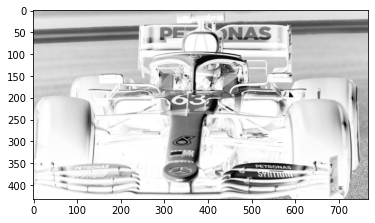

KeyError: 'labels'

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
from sklearn.model_selection import train_test_split

image_dir = 'ExampleImages'
new_shape = (256, 256)
images = []
images_bw = []
label_strs = []
for filename in os.listdir(image_dir):
    print(filename)
    image_wc = cv2.imread(f'{image_dir}/{filename}',cv2.IMREAD_COLOR)
    print(image_wc.shape, type(image_wc))
    
    image_tc = cv2.cvtColor(image_wc, cv2.COLOR_BGR2RGB)
    image_tc_bw = cv2.cvtColor(image_wc, cv2.COLOR_BGR2GRAY)
    image_tc_bw_rs = cv2.resize(image_tc_bw, new_shape)
    print(image_tc_bw_rs.shape, type(image_tc_bw_rs))

    images.append(image_tc_bw_rs)
    images_bw.append(image_tc_bw_rs)
    label_strs.append(filename.split('_')[0])
    
fig, axis = plt.subplots(nrows=1, ncols=3)
axis[0].imshow(image_wc)
axis[0].set_title('BGR: Wrong color')
axis[1].imshow(image_tc)
axis[1].set_title('RGB: True color')
axis[2].imshow(image_tc_bw, cmap='Greys')
axis[2].set_title('Grey-scale')
plt.show()

print(np.stack(images).shape)
images_arr = np.stack(images)
images_bw_arr = np.stack(images_bw)
#print(images_arr)
#print(type(images_arr))
images_arr_rs = images_arr.reshape((6, -1))
print(images_arr_rs.shape)

# Label strings to unique integers:
print(f'\nlabel_strs: {label_strs}')
label_ints = pd.Categorical(label_strs).codes
print(f'label_ints: {label_ints}')
labels_arr = np.array(label_ints)
print(f'labels_arr: {labels_arr}, {labels_arr.shape}, {type(labels_arr)}')

# Putting it all together:
# Flattening array along columns; 
# 256*256 = 65536 / with RGB 256*256*3 = 196608
features = images_bw_arr.reshape((len(labels_arr), -1))
print(f'\nfeatures: {features.shape}')
labels = labels_arr.reshape((len(labels_arr), -1))
print(f'labels: {labels.shape}')
    

df = pd.DataFrame(
    data=images_arr_rs,
    columns=['pixels_'+str(i+1) for i in range(images_arr_rs.shape[1])])

df['LABELS'] = np.array([0,0,0,1,1,2])
print(df)

plt.figure()
#plt.imshow(image_tc)
#plt.imshow(image_wc)
#plt.imshow(image_tc_bw)
plt.imshow(image_tc_bw, cmap='Greys')
plt.show()

# Train test split of the data:
# 1) If you work with two numpy arrays:
x_train, x_test, y_train, y_test = train_test_split(features, labels)

# 1) If you work with a pandas dataframe:
# IMPORTANT: If features and labels are stored in the same dataframe,
# you need to remove those when passing the features, just as done
# below with the slicing df.iloc[:,0:-1], otherwise you have 'label leackage'
# https://en.wikipedia.org/wiki/Leakage_(machine_learning)
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:-1], df['labels'])


In [3]:
df = pd.DataFrame(
    data=images_arr_rs,
    columns=['pixels_'+str(i+1) for i in range(images_arr_rs.shape[1])])
df

,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,pixels_9,pixels_10,...,pixels_65527,pixels_65528,pixels_65529,pixels_65530,pixels_65531,pixels_65532,pixels_65533,pixels_65534,pixels_65535,pixels_65536
0,76,77,79,70,72,73,78,82,93,110,...,33,36,36,38,35,38,37,39,36,35
1,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
2,81,81,81,82,82,82,83,83,83,83,...,69,19,52,85,34,1,0,0,0,1
3,58,56,55,59,55,54,54,55,58,59,...,64,56,69,53,49,46,67,48,36,43
4,124,120,120,123,120,110,110,111,108,108,...,63,75,53,56,49,66,66,59,69,55
5,96,97,97,98,98,99,99,98,97,100,...,121,92,107,137,95,100,121,136,108,105


In [ ]:
df

In [ ]:
df

In [ ]:
df